<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/argon/Notebook_Salida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Analisis de comportmiento de Uso del Oxigeno en Siderca***


---





In [4]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image


### ***Esquema de flujo Praxair _ Siderca:***

---



In [ ]:
#@title "Ejecutar para recargar imagen"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Image('/content/drive/MyDrive/Colab Notebooks/ESQUEMA ENTRADA.jpg')

## ***Carga de datos y analisis rapidos***

---



In [5]:
from prompt_toolkit.layout.dimension import D
#@title "Ejecutar Celda"
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/argon/ARSep2023.csv" #@param {type:"string"}
tab = True # @param {type:"boolean"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()
if tab==True:
   print(dfx)


       indice       Date             Time  FQI171  PIR171
0           1   9/1/2023    9/1/2023 0:00  124.78   15.25
1           2   9/1/2023    9/1/2023 0:01  105.25   15.42
2           3   9/1/2023    9/1/2023 0:02   43.40   15.66
3           4   9/1/2023    9/1/2023 0:04    0.00   15.77
4           5   9/1/2023    9/1/2023 0:05   38.11   15.82
...       ...        ...              ...     ...     ...
23035   23036  9/24/2023  9/24/2023 23:52  103.86   14.77
23036   23037  9/24/2023  9/24/2023 23:53  134.31   14.60
23037   23038  9/24/2023  9/24/2023 23:55  118.67   14.68
23038   23039  9/24/2023  9/24/2023 23:56  102.83   14.72
23039   23040  9/24/2023  9/24/2023 23:58  118.83   14.67

[23040 rows x 5 columns]


In [38]:
Url2 = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/argon/ArgonDiariossep2023.csv" #@param {type:"string"}
tab = True # @param {type:"boolean"}
datos2 = pd.read_csv(Url2,sep=",",decimal=".")
df1=pd.DataFrame(datos2)
dfx1=df1.copy()
if tab==True:
   print(dfx1)

         Date     M171
0    9/1/2023  3642.03
1    9/2/2023  2705.72
2    9/3/2023  3776.08
3    9/4/2023  3732.92
4    9/5/2023  3824.66
5    9/6/2023  3871.52
6    9/7/2023  3334.00
7    9/8/2023    15.00
8    9/9/2023  3172.22
9   9/10/2023  4010.43
10  9/11/2023  4220.74
11  9/12/2023  3686.69
12  9/13/2023  4035.39
13  9/14/2023  3032.27
14  9/15/2023  3561.92
15  9/16/2023  4052.75
16  9/17/2023  3833.49
17  9/18/2023  3559.74
18  9/19/2023  3527.36
19  9/20/2023  3874.64
20  9/21/2023  2376.25
21  9/22/2023  3414.20
22  9/23/2023  3153.98
23  9/24/2023  3427.43


In [6]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI171.describe(),2))
b=np.array(round(dfx.PIR171.describe(),2))

h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI171","PIR171"])
ke=np.array([h,a,b])
dfD= pd.DataFrame(ke.T,columns=R)

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI171, R.PIR171],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )
TABLA1(dfD)
#@title Maximos y minimos de intervalo dado:
nvalue = 10 #@param {type:"number"}
Instrumento = 'FQI171' #@param {type:"raw"}
dfx = dfx #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)
dfmax

Analisis rapidos.


,indice,Date,Time,FQI171,PIR171
10759,10760,9/12/2023,9/12/2023 4:58,393.31,13.78
10753,10754,9/12/2023,9/12/2023 4:49,392.73,13.85
12688,12689,9/14/2023,9/14/2023 5:11,391.22,15.59
12684,12685,9/14/2023,9/14/2023 5:05,390.20,14.40
11156,11157,9/12/2023,9/12/2023 14:53,389.71,13.43
10758,10759,9/12/2023,9/12/2023 4:56,388.57,14.08
8369,8370,9/9/2023,9/9/2023 17:13,388.23,13.21
12685,12686,9/14/2023,9/14/2023 5:07,386.64,14.55
11153,11154,9/12/2023,9/12/2023 14:49,384.46,13.48
12625,12626,9/14/2023,9/14/2023 3:37,382.81,12.89


## ***Analisis de la dispersión CAUDAL VS PRESION en instrumentos de entreda (FQI161/PIR161)***

---



Cantidad de items sampleados:  23040
Fecha de la muestra:  9/1/2023 al 9/24/2023
Muestreo cada 1 minuto 30 seg 


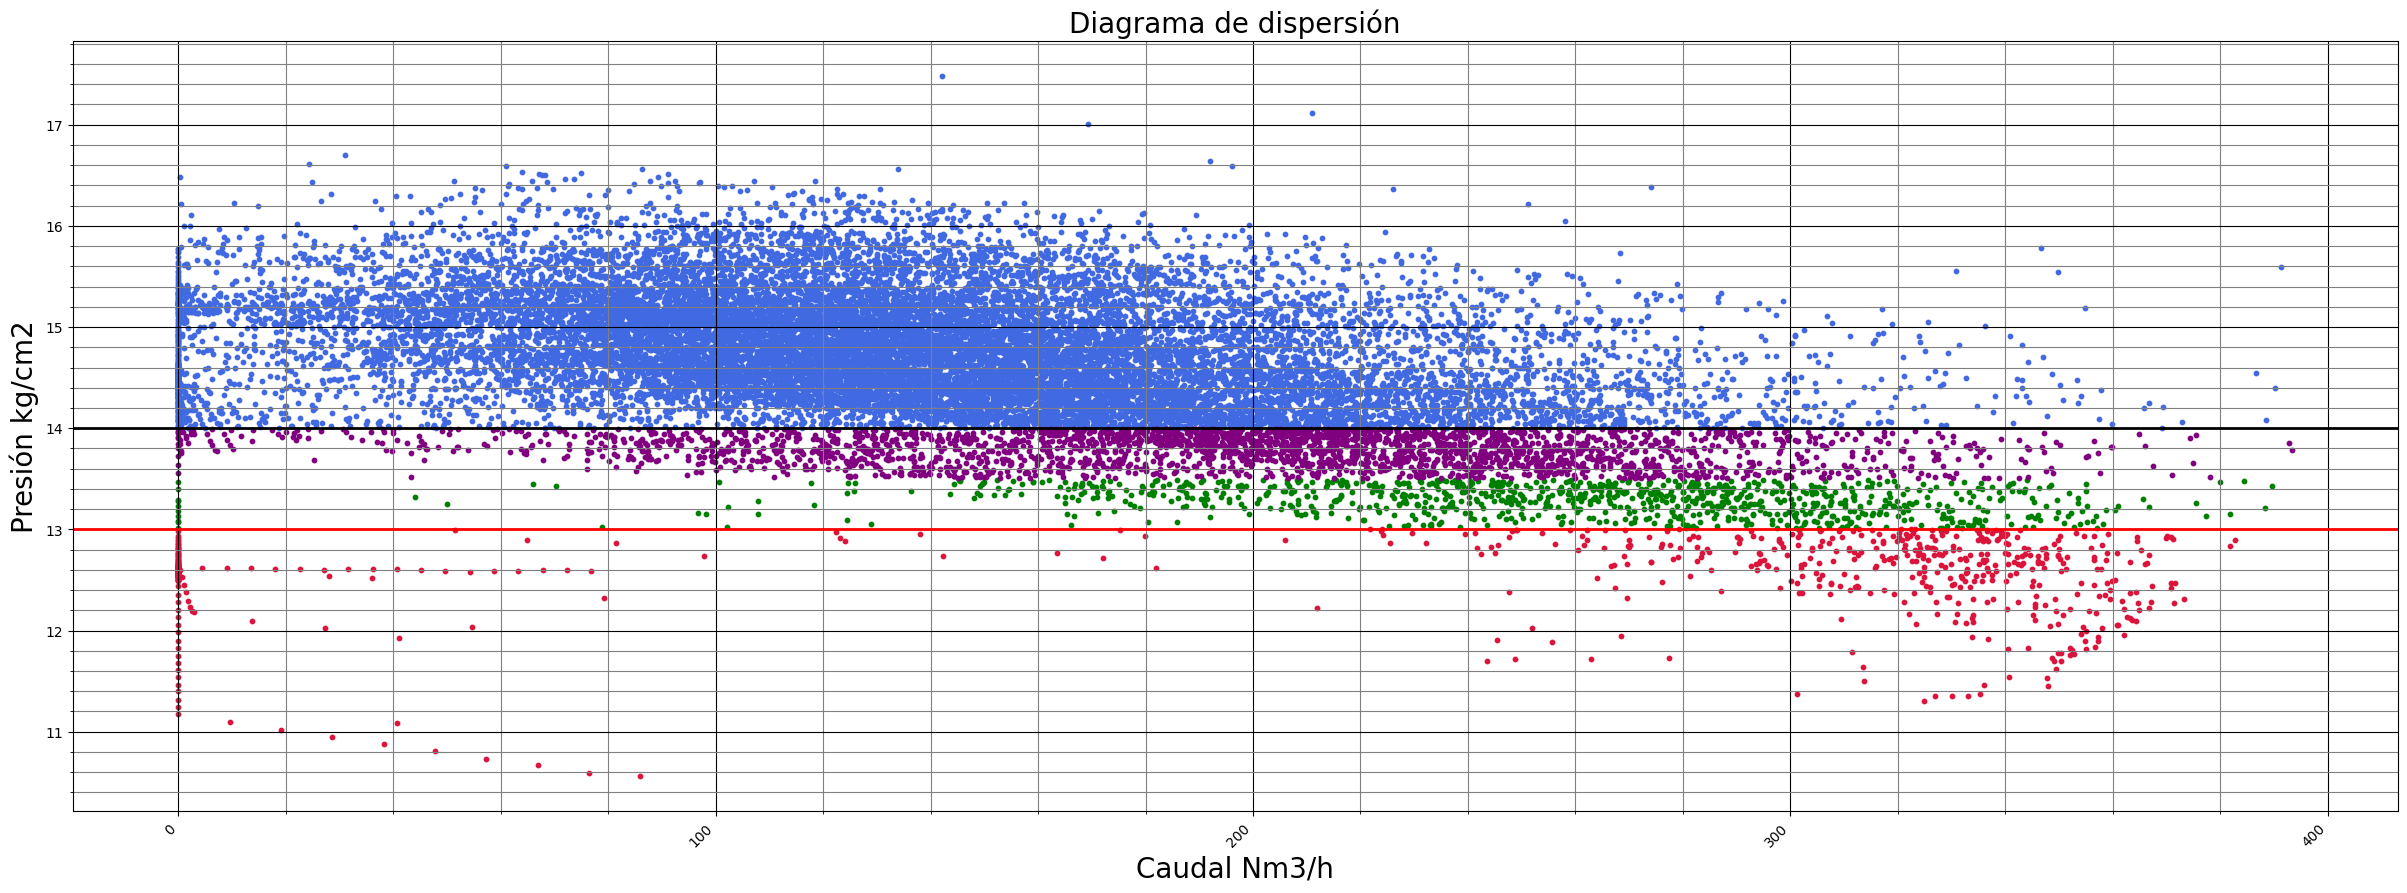

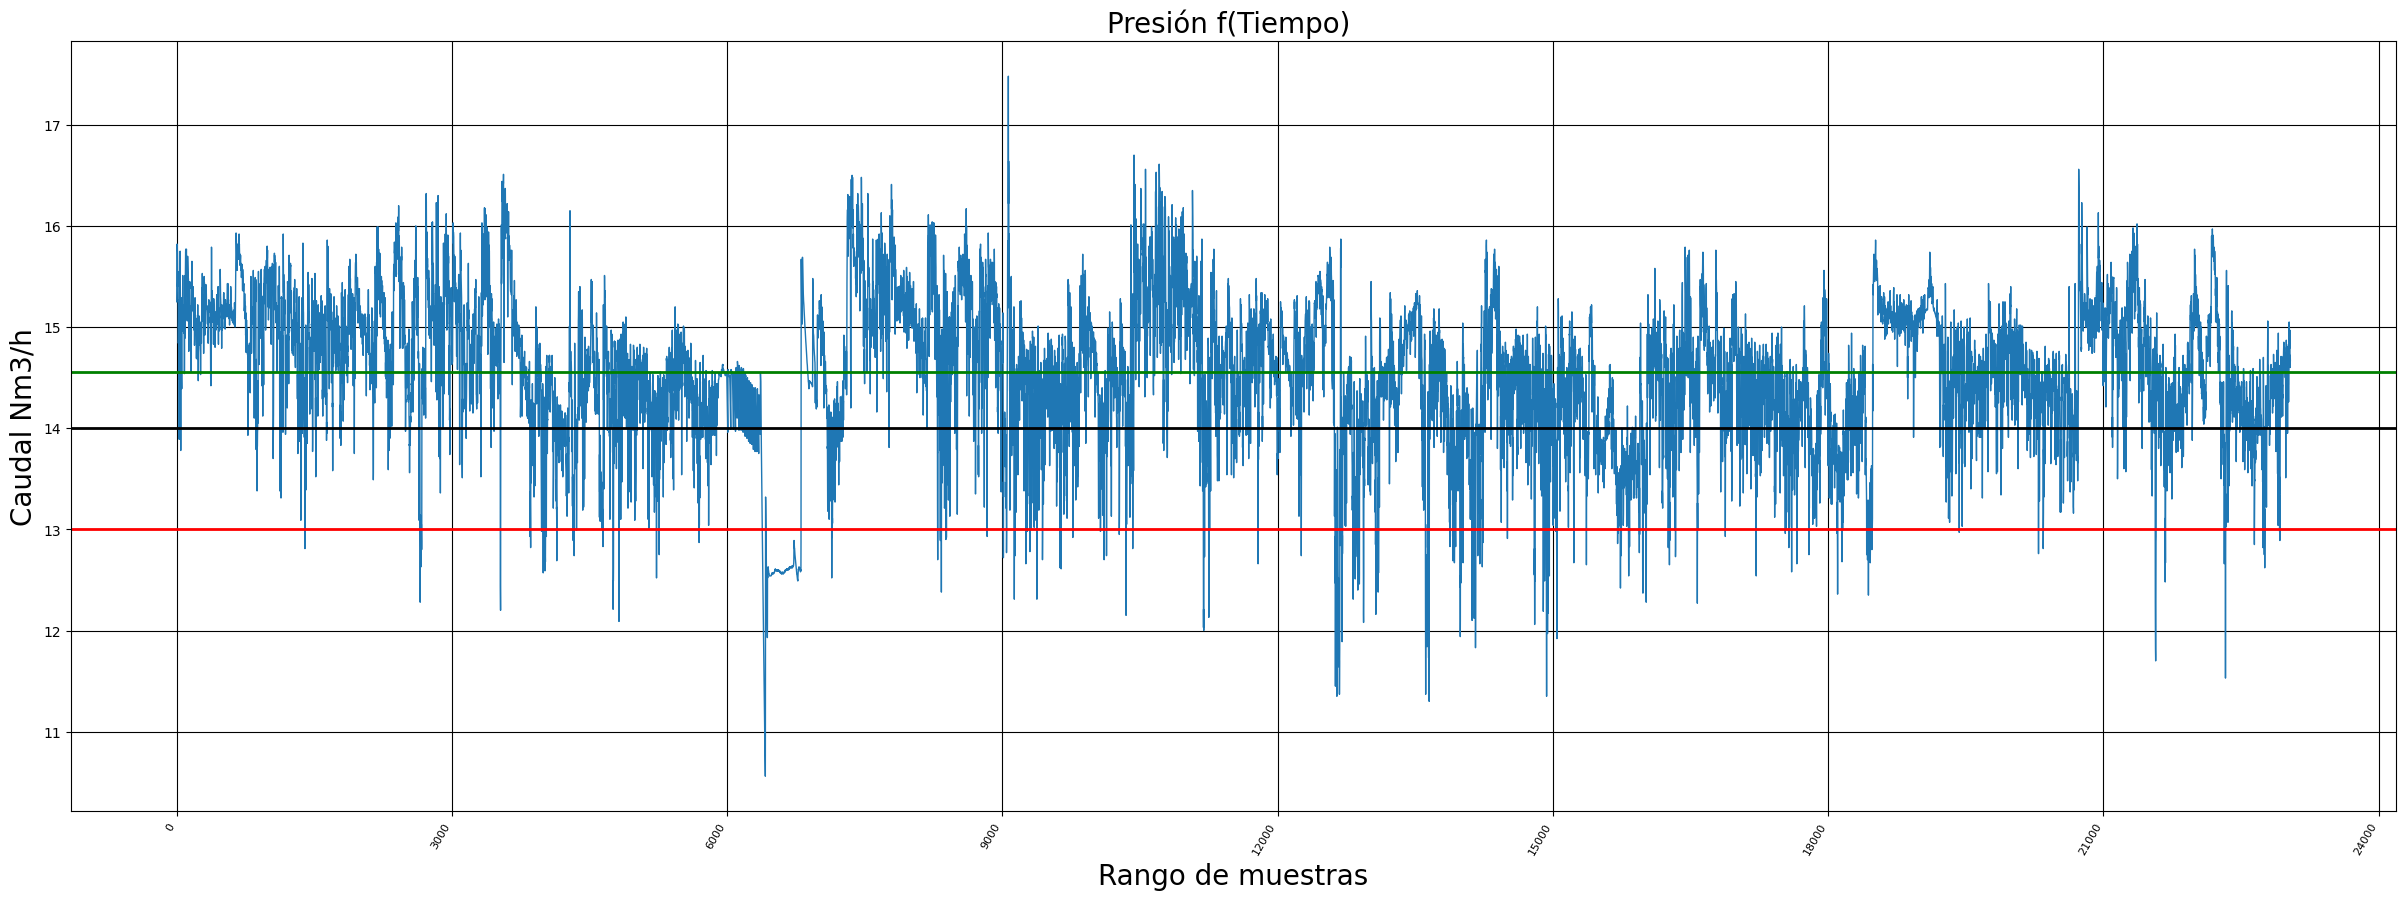

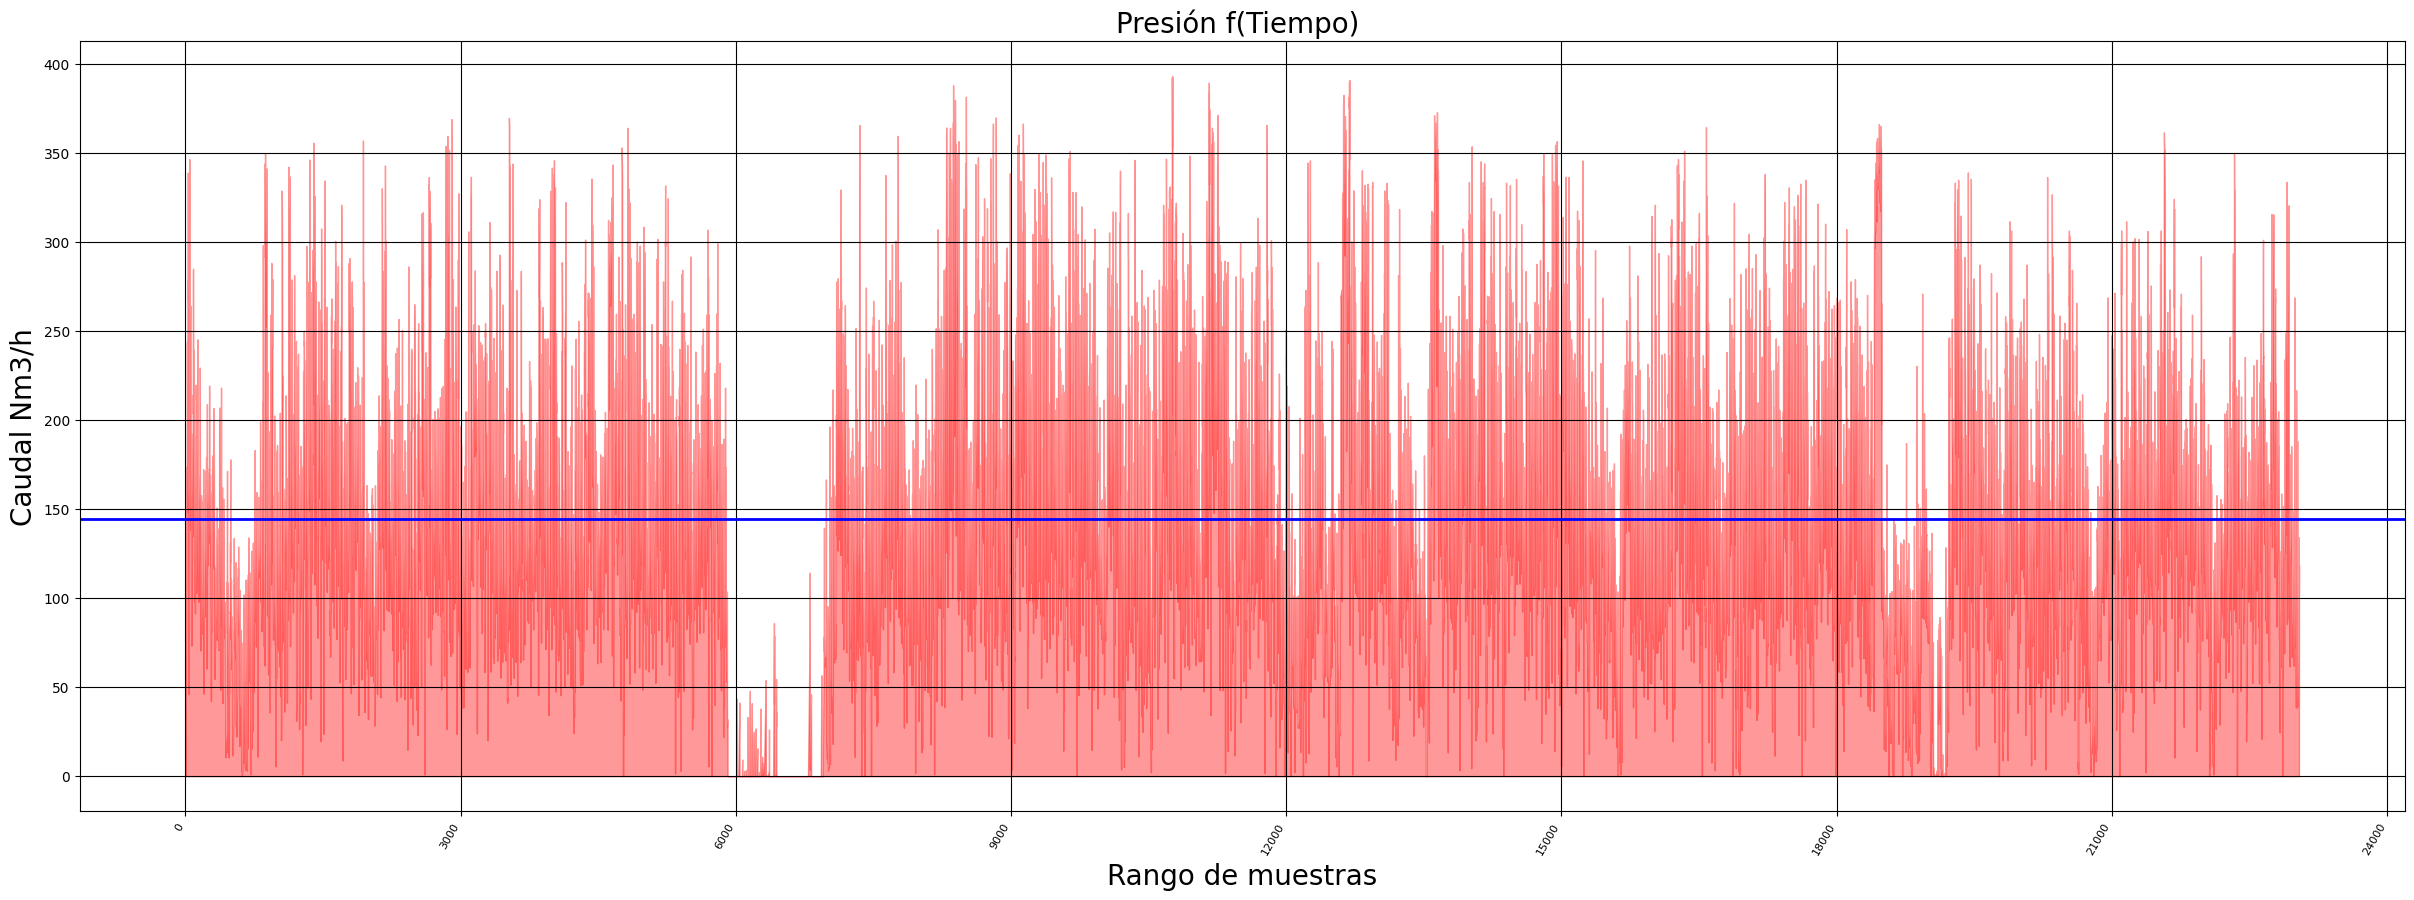

In [7]:
from matplotlib.ticker import AutoLocator
from io import DEFAULT_BUFFER_SIZE
from matplotlib.ticker import MaxNLocator
#@title Seleccionar parametros y ejecuar celda

#Time=np.array((0,len(dfx.index)))
#np.array(dfx.Date.values+' '+str(dfx.hour.values))#+':'+str(dfx.minute.values)+':'+str(dfx.second.values))

InstrumentoParametro = 'PIR171' #@param {type:"raw"}
x = 'FQI171' #@param {type:"raw"}
y = 'PIR171' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
choice=False
Secciones = "13;13.5;14" #@param {type:"string"}
zoom = True
Intervalo = "14;14.2" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])
print('Muestreo cada 1 minuto 30 seg ')

#------------------FIGURA 1
fig1, ax = plt.subplots(1, figsize=(30,10))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]

ax.set_xlabel(text,fontsize=20)
ax.set_ylabel(text1,fontsize=20)

ax.scatter(dfa[x],dfa[y],color='crimson',s=10,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=10,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=10,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=10,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
 # ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')

labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=10, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(100),)
ax.xaxis.set_minor_locator(MultipleLocator(20),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=20)
ax.axhline(y=14,linewidth=2,color='black')
ax.axhline(y=13,linewidth=2,color='red')

#------------------figura 2
figB, (ax1)= plt.subplots(1, figsize=(30,10))
ax1.plot(dfx.index,dfx['PIR171'],linewidth=1)
ax1.set_title('Presión f(Tiempo) ',fontsize=20)
ax1.set_xlabel(text2,fontsize=20)
ax1.set_ylabel(text1,fontsize=20)
ax1.set_ylabel(text,fontsize=20)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
#ax1.xaxis.set_major_locator(MultipleLocator(100))
#ax1.xaxis.set_minor_locator(MultipleLocator(20))
ax1.axhline(y=dfx['PIR171'].mean(),linewidth=2,color='green')
ax1.axhline(y=14,linewidth=2,color='black')
ax1.axhline(y=13,linewidth=2,color='red')
labels2 = ax1.get_xticklabels()
labels3= ax1.get_yticklabels()
plt.setp(labels2, rotation=60,fontsize=8, horizontalalignment='right')
plt.setp(labels3,fontsize=10, horizontalalignment='right')
ax1.axes.grid(True, which='minor',color='grey',axis='both')
ax1.axes.grid(True, which='major',color='black',axis='both')

figc, (ax2)= plt.subplots(1, figsize=(30,10))
#ax2.plot(dfx.index, dfx['FQI171'], linewidth=1, color="red")
#ax2.stackplot(dfx.index, dfx['FQI171'],alpha=0.4,color='red',labels="FQI171")
ax2.fill_between(dfx.index, dfx['FQI171'], alpha=0.4, color='red', label="FQI171")
ax2.set_title('Presión f(Tiempo) ',fontsize=20)
ax2.set_xlabel(text2,fontsize=20)
ax2.set_ylabel(text,fontsize=20)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
#ax2.xaxis.set_major_locator(MultipleLocator(100))
#ax2.xaxis.set_minor_locator(MultipleLocator(20))
ax2.axhline(y=dfx['FQI171'].mean(),linewidth=2,color='blue')

#ax2.axhline(y=14,linewidth=2,color='black')
#ax2.axhline(y=13,linewidth=2,color='red')
labels4 = ax2.get_xticklabels()
labels5 = ax2.get_yticklabels()
plt.setp(labels4, rotation=60,fontsize=8, horizontalalignment='right')
plt.setp(labels5,fontsize=10, horizontalalignment='right')
ax2.axes.grid(True, which='minor',color='grey',axis='both')
ax2.axes.grid(True, which='major',color='black',axis='both')

plt.show()



In [6]:
# @title Tabla de picos


dfcau = dfx.loc[dfx.loc[:,'FQI171'] >=300]
dfcau

,indice,Date,Time,FQI171,PIR171
54,55,9/1/2023,9/1/2023 0:40,327.13,14.07
55,56,9/1/2023,9/1/2023 0:41,358.40,13.65
56,57,9/1/2023,9/1/2023 0:41,321.17,13.84
86,87,9/1/2023,9/1/2023 1:04,346.86,13.84
87,88,9/1/2023,9/1/2023 1:05,346.67,13.72
...,...,...,...,...,...
19660,19661,9/21/2023,9/21/2023 5:44,344.50,12.97
19661,19662,9/21/2023,9/21/2023 5:45,336.63,12.97
19724,19725,9/21/2023,9/21/2023 6:32,329.00,13.18
19725,19726,9/21/2023,9/21/2023 6:33,341.56,12.91


<ipython-input-71-14a66a58b5a0>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



Promedio de consumo a la fecha 3410.06 Nm3/dia
Promedio de consumo hora  142.09 Nm3/h


<ipython-input-71-14a66a58b5a0>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



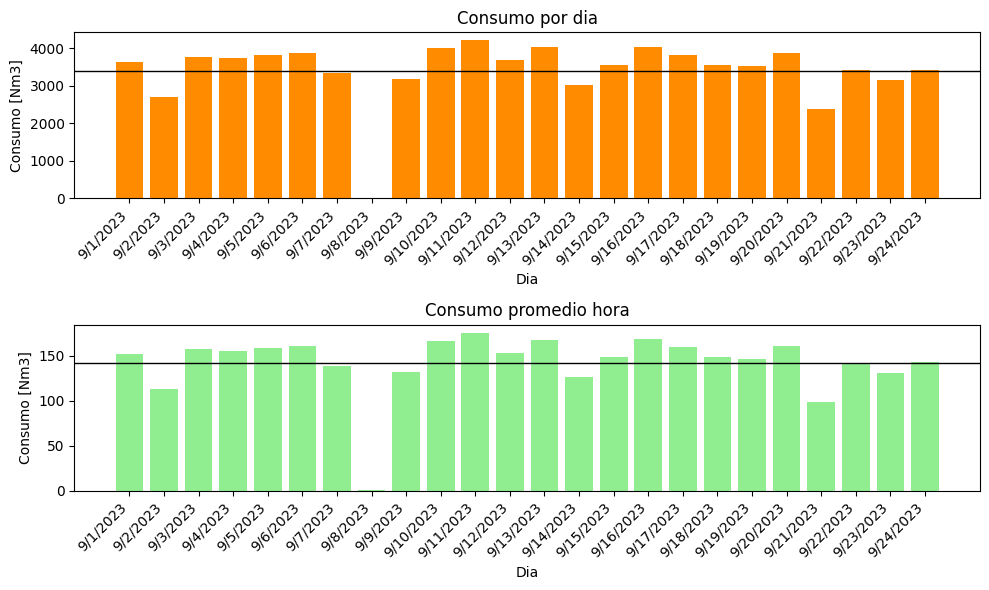

In [71]:
# @title Consumo diario y promedio.

fig1, (ax,ax1) = plt.subplots(2,1, figsize=(10, 6))

ax.bar(dfx1['Date'],dfx1['M171'], width=0.8, color="darkorange", linewidth=0.7)
ax.axhline(dfx1['M171'].mean(),linewidth=1,color='black')
ax.set_xticklabels(dfx1['Date'], rotation=45, fontsize=10, horizontalalignment='right')
ax.set_xlabel('Dia')
ax.set_ylabel('Consumo [Nm3]')
ax.set_title('Consumo por dia')
print('Promedio de consumo a la fecha',round(dfx1['M171'].mean(),2), 'Nm3/dia')

Consumo_hora = []  # Lista para almacenar el consumo por hora promedio

for i in range(len(dfx1.index)):
    consumo_promedio = dfx1['M171'][i] / 24
    Consumo_hora.append(consumo_promedio)

ax1.bar(dfx1['Date'],Consumo_hora, width=0.8, color="lightgreen", linewidth=0.7)
ax1.set_xticklabels(dfx1['Date'], rotation=45, fontsize=10, horizontalalignment='right')
ax1.axhline(np.mean(Consumo_hora),linewidth=1,color='black')
ax1.set_xlabel('Dia')
ax1.set_ylabel('Consumo [Nm3]')
ax1.set_title('Consumo promedio hora')

print('Promedio de consumo hora ',round(np.mean(Consumo_hora),2), 'Nm3/h')


plt.tight_layout()

plt.show()


<ipython-input-7-ec40c5b844fb>:23: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-7-ec40c5b844fb>:40: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-7-ec40c5b844fb>:52: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-7-ec40c5b844fb>:53: UserWarning:

FixedFormatter should only be used together with FixedLocator



Cantidad de picos entre 300 y 350:  [  5.  46.  15.  23.  53.  30.   1.   5.   6.  36.  35.  53.   8. 130.
  62.  34.   2.  28.  46. 110.]


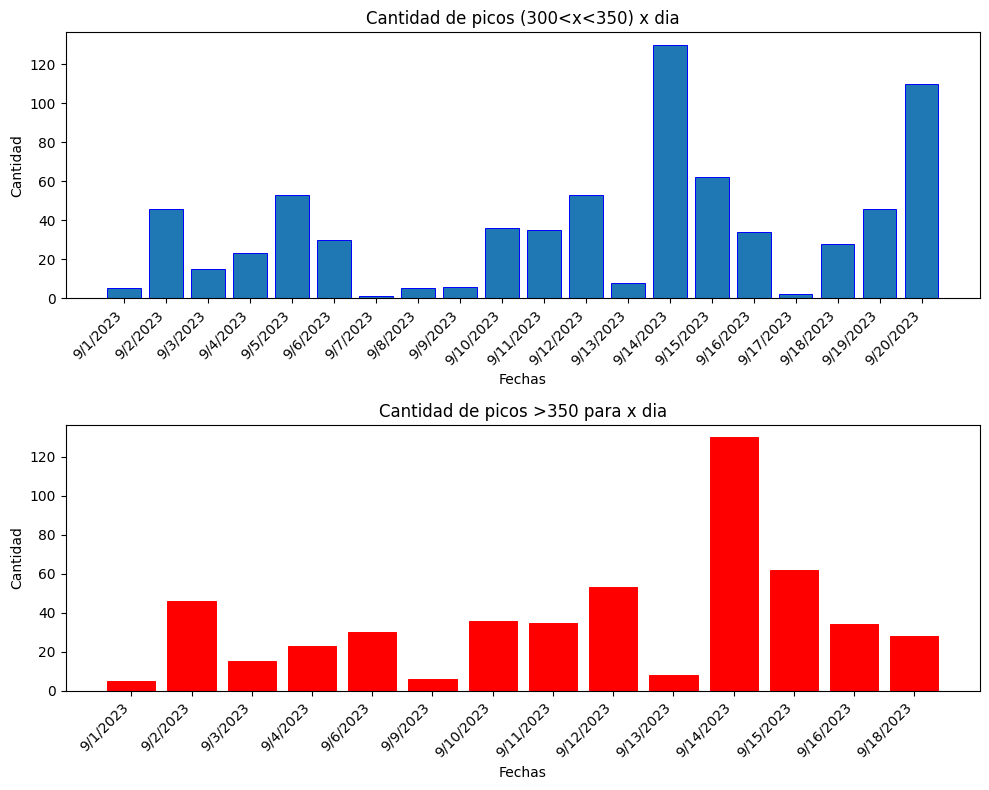

Cantidad de picos entre > 350:  [  5.  46.  15.  23.  30.   6.  36.  35.  53.   8. 130.  62.  34.  28.]
valor mas alto : 
       indice       Date            Time  FQI171  PIR171
12890   12891  9/14/2023  9/14/2023 5:07  398.38   14.27
10947   10948  9/12/2023  9/12/2023 4:50  394.63   13.69


In [7]:
# @title FRECUENCIA de picos diario


arreglo_dias = []
arreglo_cuenta = []
arreglo_dias1 = []
arreglo_cuenta1 = []
dfcau = dfx[(dfx['FQI171'] >= 300) & (dfx['FQI171']<= 350)]
dfcau1 = dfx[dfx['FQI171'] > 350]
#
for i in range(len(dfcau['Date'])):
    fecha_actual = dfcau['Date'].values[i]

    # Verificar si la fecha actual es diferente de la siguiente fecha
    if i < len(dfcau['Date']) - 1 and fecha_actual != dfcau['Date'].values[i + 1]:
        arreglo_dias = np.append(arreglo_dias, fecha_actual)

# Agregar la última fecha si es diferente de la penúltima fecha (opcional)
if len(dfcau['Date']) > 1 and dfcau['Date'].values[-1] != dfcau['Date'].values[-2]:
    arreglo_dias = np.append(arreglo_dias, dfcau['Date'].values[-1])

for i in range(len(arreglo_dias)):
    conteo = len(dfcau[dfx['Date'] == arreglo_dias[i]])
    arreglo_cuenta = np.append(arreglo_cuenta, conteo)

#print(arreglo_dias)

for i in range(len(dfcau1['Date'])):
    fecha_actual = dfcau1['Date'].values[i]

    # Verificar si la fecha actual es diferente de la siguiente fecha
    if i < len(dfcau1['Date']) - 1 and fecha_actual != dfcau1['Date'].values[i + 1]:
        arreglo_dias1 = np.append(arreglo_dias1, fecha_actual)

# Agregar la última fecha si es diferente de la penúltima fecha (opcional)
if len(dfcau['Date']) > 1 and dfcau['Date'].values[-1] != dfcau['Date'].values[-2]:
    arreglo_dia1 = np.append(arreglo_dias1, dfcau['Date'].values[-1])

for i in range(len(arreglo_dias1)):
    conteo1 = len(dfcau[dfx['Date'] == arreglo_dias1[i]])
    arreglo_cuenta1 = np.append(arreglo_cuenta1, conteo1)

x=arreglo_dias
y=arreglo_cuenta
x1=arreglo_dias1
y1=arreglo_cuenta1
print("Cantidad de picos entre 300 y 350: ", arreglo_cuenta )
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 8))

ax.bar(x, y, width=0.8, edgecolor="blue", linewidth=0.7)
ax1.bar(x1, y1, width=0.8, edgecolor="red", linewidth=0.7, color="red")
ax.set_xticklabels(arreglo_dias, rotation=45, fontsize=10, horizontalalignment='right')
ax1.set_xticklabels(arreglo_dias1, rotation=45, fontsize=10, horizontalalignment='right')
ax.set_xlabel('Fechas')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de picos (300<x<350) x dia')
ax1.set_xlabel('Fechas')
ax1.set_ylabel('Cantidad')
ax1.set_title('Cantidad de picos >350 para x dia')

plt.tight_layout()

plt.show()

print("Cantidad de picos entre > 350: ", arreglo_cuenta1 )
print("valor mas alto : ")
print(dfcau1.nlargest(2,'FQI171') )



